# Idiomatic Pandas
## Better Pandas Code


https://github.com/mattharrison/2023-odsc-east

## About Matt  Harrison @\_\_mharrison\_\_

* Author of Effective Pandas, Machine Learning Pocket Reference, and Illustrated Guide to Python 3.
* Advisor at Ponder (creators of Modin)
* Corporate trainer at MetaSnake. Taught Pandas to 1000's of students.
* Upcoming Live Courses <a href='store.metasnake.com'>at MetaSnake</a>

## Pandas Background

* 2000 NLP
* 2006 Created Python OLAP Engine
* 2009 Heard about Pandas
* Used Pandas for failure modeling, analytics, and ml
* 2016 Learning the Pandas Library
* 2019 Spark
* 2020 Pandas Cookbook
* 2021 Effective Pandas
* 2022 CuDf, Modin, Polars
* 2023 Pandas 2.0

## Why Python?

* Used everywhere
* #1 language at Universities
* Language of Data Science
* 400k+ Packages

## Outline of Opinions

* Load Data
* Types
* Chaining
* Mutation
* Apply
* Aggregation

## Data

In [ ]:
!pip install -U pandas pyarrow

In [6]:
from IPython.display import display
import numpy as np
import pandas as pd
#import modin.pandas as pd

In [7]:
pd.__version__

'2.0.1'

In [8]:
pd.options.display.min_rows = 20

In [9]:
autos = pd.read_csv('https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip',
                   dtype_backend='pyarrow',
                   engine='pyarrow')

In [76]:
# a glorious function
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]',
              'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]
    )

tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.0,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.9,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.2,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.2,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,False
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.8,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.8,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.6,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.6,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.8,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


In [ ]:
autos = pd.read_csv('/mnt/c/Users/matt/Downloads/vehicles.csv.zip',
                    dtype_backend='pyarrow',
                    engine='pyarrow')

In [10]:
autos

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
5,14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
6,13.184400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
7,13.733750,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
8,12.677308,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
9,13.184400,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


In [11]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [12]:
# 68 Megs (w/ Pandas 1.x)
# 29 M (Pandas 2)
autos.memory_usage(deep=True).sum()

29657308

## Exercise

* View the documentation for the `.info` method (use `df.info??`)
* Run the `.info()` method
* Run the `.describe()` method

## Types
Getting the right types will enable analysis and correctness.

In [13]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']

In [14]:
autos[cols].dtypes

city08         int64[pyarrow]
comb08         int64[pyarrow]
highway08      int64[pyarrow]
cylinders      int64[pyarrow]
displ         double[pyarrow]
drive         string[pyarrow]
eng_dscr      string[pyarrow]
fuelCost08     int64[pyarrow]
make          string[pyarrow]
model         string[pyarrow]
trany         string[pyarrow]
range          int64[pyarrow]
createdOn     string[pyarrow]
year           int64[pyarrow]
dtype: object

In [15]:
autos[cols].memory_usage(deep=False)

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      331949
displ          331949
drive          877462
eng_dscr       358886
fuelCost08     329152
make           425635
model          632502
trany          752919
range          329152
createdOn     1316608
year           329152
dtype: int64

In [16]:
# 19 Megs (Pandas 1)
# 7 Megs (Pandas 2)
autos[cols].memory_usage(deep=False).sum()

7002950

### Ints

In [17]:
autos[cols].select_dtypes(int).describe()

,city08,comb08,highway08,cylinders,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,40938.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.717084,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.755517,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,2.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,7400.000000,370.000000,2020.000000


In [22]:
# chaining
(autos
 [cols]
 .select_dtypes(int)
 .describe()
)

,city08,comb08,highway08,cylinders,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,40938.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.717084,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.755517,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,2.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,7400.000000,370.000000,2020.000000


In [23]:
# can comb08 be an int8?
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [24]:
# no but maybe a uint8
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [25]:
# chaining
(autos
 [cols]
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'uint8[pyarrow]' })
 #.select_dtypes([int, 'int8[pyarrow]'])  # only int64 or int8
 .select_dtypes('integer')  # all integers
 .describe()
)

,city08,comb08,highway08,cylinders,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,40938.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.717084,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.755517,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,2.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,7400.000000,370.000000,2020.000000


## Integer Exercise
* Find the 90% `.quantile` for the integer columns
* Find the *spearman* correlation coefficient (`.corr`) for the integer columns

## Other int types

In [26]:
# Fancy query to select columns where row "max" is < 255
(autos
 [cols]
 .describe()
 .loc[:, lambda a_df: a_df.loc['max'] < 255]
)

,city08,comb08,highway08,cylinders,displ
count,41144.000000,41144.000000,41144.000000,40938.000000,40940.000000
mean,18.369045,20.616396,24.504667,5.717084,3.294238
std,7.905886,7.674535,7.730364,1.755517,1.357151
min,6.000000,7.000000,9.000000,2.000000,0.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000
50%,17.000000,20.000000,24.000000,6.000000,3.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000
max,150.000000,136.000000,124.000000,16.000000,8.400000


In [ ]:
# chaining
# use 'integer' so see all int-like columns
(autos
 [cols]
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]', 'year': 'int16[pyarrow]'})
 .select_dtypes(['integer'])  # see https://numpy.org/doc/stable/reference/arrays.scalars.html
 .describe()
)

In [27]:
# chaining
(autos
 [cols]
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 
          'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]', 'year': 'int16[pyarrow]'})
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

5511480

### Floats

In [28]:
(autos
[cols]
.select_dtypes('float'))

,displ
0,2.0
1,4.9
2,2.2
3,5.2
4,2.2
5,1.8
6,1.8
7,1.6
8,1.6
9,1.8


In [29]:
# In pandas 1 this would be float
autos.cylinders.dtype

int64[pyarrow]

In [30]:
# surprise! cylinders looks int-like
autos.cylinders.describe()

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: double[pyarrow]

In [31]:
# opps! missing values
autos.cylinders.value_counts(dropna=False)

cylinders
4       15938
6       14284
8        8801
5         771
12        626
3         279
<NA>      206
10        170
2          59
16         10
Name: count, dtype: int64[pyarrow]

In [32]:
# where are they missing?
(autos
  [cols]
  .query('cylinders.isna()')
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,<NA>,<NA>,,,800,Nissan,Altra EV,,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,<NA>,<NA>,2-Wheel Drive,,900,Toyota,RAV4 EV,,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,<NA>,<NA>,2-Wheel Drive,,900,Toyota,RAV4 EV,,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,<NA>,<NA>,,,1000,Ford,Th!nk,,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,<NA>,<NA>,2-Wheel Drive,,1700,Ford,Explorer USPS Electric,,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,<NA>,<NA>,,,900,Nissan,Hyper-Mini,,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,<NA>,<NA>,2-Wheel Drive,,850,Toyota,RAV4 EV,,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,<NA>,<NA>,2-Wheel Drive,,1700,Ford,Explorer USPS Electric,,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,<NA>,<NA>,2-Wheel Drive,,850,Toyota,RAV4 EV,,95,Tue Jan 01 00:00:00 EST 2013,2003
21413,22,24,28,<NA>,<NA>,4-Wheel Drive,,1750,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


In [33]:
# chaining - add cylinders and displ columns
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0))
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 
          'fuelCost08': 'int16[pyarrow]', 'range': 'int16[pyarrow]', 'year': 'int16[pyarrow]',  })
 .describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,5.688460,3.277904,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,1.797009,1.373415,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,0.000000,0.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.200000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,6.000000,4.300000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,16.000000,8.400000,7400.000000,370.000000,2020.000000


In [ ]:
autos[cols].describe()

In [36]:
int(True)

1

In [37]:
isinstance(True, int)

True

In [40]:
autos.isna().sum()

barrels08     0
barrelsA08    0
charge120     0
charge240     0
city08        0
city08U       0
cityA08       0
cityA08U      0
cityCD        0
cityE         0
             ..
mfrCode       0
c240Dscr      0
charge240b    0
c240bDscr     0
createdOn     0
modifiedOn    0
startStop     0
phevCity      0
phevHwy       0
phevComb      0
Length: 83, dtype: int64

In [41]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [42]:
# use this to inspect float sizes
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [43]:
# Pyarrow doesn't have float16...
# use this to inspect float sizes
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [44]:
# chaining - convert displ to float32
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'))
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 
          'fuelCost08': 'int16[pyarrow]', 'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]'})
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.2,Rear-Wheel Drive,,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


In [45]:
# new memory usage
(autos
 .loc[:, cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'))
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]',
          'fuelCost08': 'int16[pyarrow]', 'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]'})
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

5063588

## Float Exercise

* Find the `.count` of missing values for the float columns
* Find the Pearson correlation coefficient for float columns

### Objects

In [46]:
# pandas 1.x
(autos
 [cols]
 .select_dtypes(object)
)

""
0
1
2
3
4
5
6
7
8
9


In [47]:
# pandas 2
(autos
 [cols]
 .select_dtypes('string')
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [48]:
# looks categorical
# Note that missing values are EMPTY strings in Pandas 2
(autos.drive.value_counts(dropna=False))

drive
Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
                               1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: count, dtype: int64[pyarrow]

In [49]:
# where are the values missing for drive?
(autos
 [cols]
 .query('drive.isna()'))

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year


In [50]:
# where are the values missing for drive?
(autos
 [cols]
 .query('drive == ""'))

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,<NA>,<NA>,,,800,Nissan,Altra EV,,90,Tue Jan 01 00:00:00 EST 2013,2000
8144,74,65,58,<NA>,<NA>,,,1000,Ford,Th!nk,,29,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,<NA>,<NA>,,,900,Nissan,Hyper-Mini,,33,Tue Jan 01 00:00:00 EST 2013,2001
18217,18,21,25,4,2.0,,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18218,20,22,26,4,1.5,,(FFS),1900,Bertone,X1/9,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18219,13,15,20,8,5.7,,(350 V8) (FFS),2800,Chevrolet,Corvette,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18220,13,15,20,8,5.7,,(350 V8) (FFS),2800,Chevrolet,Corvette,Manual 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18221,15,17,20,6,3.0,,"(FFS,TRBO)",2500,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18222,16,18,20,6,3.0,,(FFS),2350,Nissan,300ZX,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1984
18223,16,18,22,6,3.0,,"(FFS,TRBO)",2350,Nissan,300ZX,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1984


In [55]:
autos.sample(10)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
7411,20.600625,0.0,0.0,0.0,15,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
33019,19.388824,0.0,0.0,0.0,15,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
14985,15.695714,0.0,0.0,0.0,18,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
7119,0.116250,0.0,0.0,0.0,14,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2038,15.695714,0.0,0.0,0.0,18,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
22222,14.330870,0.0,0.0,0.0,20,20.1535,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Mon Sep 26 00:00:00 EDT 2016,,0,0,0
25217,16.480500,0.0,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
9794,16.480500,0.0,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
14478,13.733750,0.0,0.0,0.0,21,0.0000,0,0.0,0.0,0.0,...,,,0.0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
25759,15.695714,0.0,0.0,0.0,19,19.0003,0,0.0,0.0,0.0,...,KMX,,0.0,,Tue Jan 01 00:00:00 EST 2013,Mon Sep 26 00:00:00 EDT 2016,N,0,0,0


In [56]:
# drive and make (in .astype) to category
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
         drive=autos.drive.replace('', 'Other').astype('category')
        )
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

3890665

In [57]:
# let's inspect trany
# looks like it has two pieces of information embedded in column
(autos.trany.value_counts(dropna=False))

trany
Automatic 4-spd                     11047
Manual 5-spd                         8361
Automatic 3-spd                      3151
Automatic (S6)                       3106
Manual 6-spd                         2757
Automatic 5-spd                      2203
Automatic (S8)                       1665
Automatic 6-spd                      1619
Manual 4-spd                         1483
Automatic (S5)                        833
Automatic (variable gear ratios)      826
Automatic 7-spd                       724
Automatic 8-spd                       433
Automatic (AM-S7)                     424
Automatic (S7)                        327
Automatic 9-spd                       293
Automatic (AM7)                       245
Automatic (S4)                        233
Automatic (AV-S6)                     208
Automatic (A1)                        201
Automatic (AM6)                       151
Automatic (AV-S7)                     139
Automatic (S10)                       124
Automatic (AM-S6)           

In [58]:
# add automatic, speeds from trany, then drop trany
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
         drive=autos.drive.replace('', 'Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         # pyarrow doesn't like next line
         speeds=autos.trany.str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]')
        )
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
 .drop(columns=['trany'])
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

NotImplementedError: str.extract not supported with pd.ArrowDtype(pa.string()).

In [59]:
# add automatic, speeds from trany, then drop trany
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
         drive=autos.drive.replace('', 'Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         # pyarrow doesn't like next line
         speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]')
        )
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
 .drop(columns=['trany'])
 #.memory_usage(deep=True)
 #.sum()  # was 19,647,323
)

3189176

In [66]:
(autos
 .trany
 .astype(str)
 .str.extract(r'(\d+)')
 .fillna('20')
 .astype('int8[pyarrow]')
)

,0
0,5
1,5
2,5
3,3
4,5
5,3
6,5
7,3
8,5
9,4


## String Exercise
* Find the `.str` attributes of a string column
* Pull up the documentation for a string attribute (`.startswith`)

### Dates

In [67]:
autos.createdOn

0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
5        Tue Jan 01 00:00:00 EST 2013
6        Tue Jan 01 00:00:00 EST 2013
7        Tue Jan 01 00:00:00 EST 2013
8        Tue Jan 01 00:00:00 EST 2013
9        Tue Jan 01 00:00:00 EST 2013
                     ...             
41134    Tue Jan 01 00:00:00 EST 2013
41135    Tue Jan 01 00:00:00 EST 2013
41136    Tue Jan 01 00:00:00 EST 2013
41137    Tue Jan 01 00:00:00 EST 2013
41138    Tue Jan 01 00:00:00 EST 2013
41139    Tue Jan 01 00:00:00 EST 2013
41140    Tue Jan 01 00:00:00 EST 2013
41141    Tue Jan 01 00:00:00 EST 2013
41142    Tue Jan 01 00:00:00 EST 2013
41143    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, Length: 41144, dtype: string[pyarrow]

In [68]:
pd.to_datetime(autos.createdOn)

/private/tmp/odscenv/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


ValueError: time data "Tue Oct 29 00:00:00 EDT 2013" doesn't match format "%a %b %d %H:%M:%S EST %Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [69]:
# add a format (works for a few...)
pd.to_datetime(autos.createdOn.iloc[:10], format='%a %b %d %H:%M:%S %Z %Y')

0   2013-01-01 00:00:00-05:00
1   2013-01-01 00:00:00-05:00
2   2013-01-01 00:00:00-05:00
3   2013-01-01 00:00:00-05:00
4   2013-01-01 00:00:00-05:00
5   2013-01-01 00:00:00-05:00
6   2013-01-01 00:00:00-05:00
7   2013-01-01 00:00:00-05:00
8   2013-01-01 00:00:00-05:00
9   2013-01-01 00:00:00-05:00
Name: createdOn, dtype: datetime64[ns, EST]

In [70]:
pd.to_datetime(autos.createdOn, format='%a %b %d %H:%M:%S %Z %Y')

ValueError: time data "Tue Oct 29 00:00:00 EDT 2013" doesn't match format "%a %b %d %H:%M:%S %Z %Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [71]:
# Change problematic abbreviatios to offsets
# Also need to convert to UTC (otherwise type is bad)
pd.to_datetime(autos
    .createdOn
    .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
              format='%a %b %d %H:%M:%S %z %Y', utc=True)

0       2013-01-01 05:00:00+00:00
1       2013-01-01 05:00:00+00:00
2       2013-01-01 05:00:00+00:00
3       2013-01-01 05:00:00+00:00
4       2013-01-01 05:00:00+00:00
5       2013-01-01 05:00:00+00:00
6       2013-01-01 05:00:00+00:00
7       2013-01-01 05:00:00+00:00
8       2013-01-01 05:00:00+00:00
9       2013-01-01 05:00:00+00:00
                   ...           
41134   2013-01-01 05:00:00+00:00
41135   2013-01-01 05:00:00+00:00
41136   2013-01-01 05:00:00+00:00
41137   2013-01-01 05:00:00+00:00
41138   2013-01-01 05:00:00+00:00
41139   2013-01-01 05:00:00+00:00
41140   2013-01-01 05:00:00+00:00
41141   2013-01-01 05:00:00+00:00
41142   2013-01-01 05:00:00+00:00
41143   2013-01-01 05:00:00+00:00
Name: createdOn, Length: 41144, dtype: datetime64[ns, UTC]

In [72]:
# Change TZ
dates = (pd.to_datetime(autos
    .createdOn
    .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
              format='%a %b %d %H:%M:%S %z %Y', utc=True)
 .dt.tz_convert('America/New_York')
)

dates

0       2013-01-01 00:00:00-05:00
1       2013-01-01 00:00:00-05:00
2       2013-01-01 00:00:00-05:00
3       2013-01-01 00:00:00-05:00
4       2013-01-01 00:00:00-05:00
5       2013-01-01 00:00:00-05:00
6       2013-01-01 00:00:00-05:00
7       2013-01-01 00:00:00-05:00
8       2013-01-01 00:00:00-05:00
9       2013-01-01 00:00:00-05:00
                   ...           
41134   2013-01-01 00:00:00-05:00
41135   2013-01-01 00:00:00-05:00
41136   2013-01-01 00:00:00-05:00
41137   2013-01-01 00:00:00-05:00
41138   2013-01-01 00:00:00-05:00
41139   2013-01-01 00:00:00-05:00
41140   2013-01-01 00:00:00-05:00
41141   2013-01-01 00:00:00-05:00
41142   2013-01-01 00:00:00-05:00
41143   2013-01-01 00:00:00-05:00
Name: createdOn, Length: 41144, dtype: datetime64[ns, America/New_York]

In [ ]:
dates.dt.

In [73]:
# add createdOn
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
         drive=autos.drive.replace('', 'Other').astype('category'),
         automatic=autos.trany.str.contains('Auto'),
         speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
         createdOn=pd.to_datetime(autos
            .createdOn
            .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                      format='%a %b %d %H:%M:%S %z %Y', utc=True)
            .dt.tz_convert('America/New_York')
        )
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
 .drop(columns=['trany'])
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

2201720

In [74]:
autos.eng_dscr.value_counts()

eng_dscr
                                       16153
(FFS)                                   8827
SIDI                                    5526
(FFS) CA model                           926
(FFS)      (MPFI)                        734
FFV                                      701
(FFS,TRBO)                               666
(350 V8) (FFS)                           411
(GUZZLER)  (FFS)                         366
SOHC                                     354
                                       ...  
SID                                        1
SIDI; Without Cylinder Deactivation        1
(3S-GTE)   (FFS,TRBO)                      1
GMP4       (FFS,TRBO) (MPFI)               1
(GMP4+IC)  (FFS,TRBO) (MPFI)               1
(GMP4)     (FFS,TRBO) (MPFI)               1
16-V, CAL. (FFS)      (MPFI)               1
(FFS) 1 barrel carb                        1
(SPG)      (FFS,TRBO)                      1
(164S)     (FFS)      (MPFI)               1
Name: count, Length: 558, dtype: int64[pyarrow

In [75]:
# add ffs (Feedback fuel system), drop eng_descr
(autos
 [cols]
 .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
         displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
         drive=autos.drive.replace('', 'Other').astype('category'),
         automatic=autos.trany.astype(str).str.contains('Auto'),
         speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
         createdOn=pd.to_datetime(autos
            .createdOn
            .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                      format='%a %b %d %H:%M:%S %z %Y', utc=True)
            .dt.tz_convert('America/New_York'),
         ffs=autos.eng_dscr.str.contains('FFS')
        )
 .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
          'range': 'int16[pyarrow]', 'year': 'int16[pyarrow]', 'make': 'category'})
 #.drop(columns=['trany', 'eng_dscr'])
 .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]
 #.columns
 .memory_usage(deep=True)
 .sum()  # was 19,647,323
)

1883978

In [76]:
# a glorious function
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]',
              'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]
    )

tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.0,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.9,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.2,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.2,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,False
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.8,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.8,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.6,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.6,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.8,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


## Date Exercise
* List the attributes of the `.dt` attribute

## Chain

Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps.

(BTW, this is actually what we did above.)

<div class='alert alert-warning'>
    Hint: Leverage <tt>.pipe</tt> if you can't find a way to chain 😉🐼💪
</div>
    




In [ ]:
# show debugging this

def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS').fillna(False)
            )
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
              'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category', 'model': 'category',
              'automatic': 'category', })
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]            
    )

tweak_autos(autos)#.dtypes

In [ ]:
# 1.5 Megs!
tweak_autos(autos).memory_usage(deep=True).sum()

In [77]:
# compare chain to this mess
a1 = autos[cols]
cyls = autos.cylinders.fillna(0)
cyls2 = cyls.astype('int8[pyarrow]')
a1['cylinders'] = cyls2
displ = a1.displ
displ2 = displ.fillna(0)
displ3 = displ2.astype('float32[pyarrow]')
a1.displ = displ3
a1.drive = autos.drive.replace('', 'Other').astype('category')
a1['automatic'] = autos.trany.astype(str).str.contains('Auto')           
speed = autos.trany.astype(str).str.extract(r'(\d+)')
speedfill = speed.fillna('20')
speedint = speedfill.astype('int8[pyarrow]')
a1['speeds'] = speedint
a1.createdOn=pd.to_datetime(autos.createdOn).dt.tz_localize('America/New_York')
a1.ffs=autos.eng_dscr.str.contains('FFS')
a1['highway08'] = autos.highway08.astype('int8[pyarrow]')
a1['city08'] = autos.city08.astype('int8[pyarrow]')
a1['comb08'] = autos.comb08.astype('int16[pyarrow]')
a1['fuelCost08'] = autos.fuelCost08.astype('int16[pyarrow]')
a1['range'] = autos.range.astype('int16[pyarrow]')
a1['make'] = autos.make.astype('category')
a3 = a1.drop(columns=['trany', 'eng_dscr'])

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_35379/1509134688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['cylinders'] = cyls2
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_35379/1509134688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1.displ = displ3
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_35379/1509134688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

ValueError: time data "Tue Oct 29 00:00:00 EDT 2013" doesn't match format "%a %b %d %H:%M:%S EST %Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [79]:
###### easy to debug
#  - assign to var (df3)
#  - comment out
#  - pipe to display


from IPython.display import display

def get_var(df, var_name):
    globals()[var_name] = df
    return df

def tweak_autos(autos):
    return (autos
    .pipe(lambda df: print(df.shape) or df)                                    
     [cols]
    .pipe(lambda df: print(df.shape) or df)                        
      # create var                        
     .pipe(get_var, 'df3')
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),        
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     # debug pipe            
    .pipe(lambda df: print(df.shape) or df)            
     .pipe(lambda df: display(df) or df)
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]', 
              'range': 'int16[pyarrow]', 'year': 'int16[pyarrow]', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]            
    )

tweak_autos(autos)

(41144, 83)
(41144, 14)
(41144, 17)


,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.2,Rear-Wheel Drive,,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3,False
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,2013-01-01 00:00:00-05:00,1993,True,4,True


,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.0,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.9,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.2,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.2,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,False
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.8,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.8,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.6,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.6,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.8,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


In [80]:
# inspect intermediate data frame
df3

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
0,19,21,25,4,2.0,Rear-Wheel Drive,(FFS),2000,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
1,9,11,14,12,4.9,Rear-Wheel Drive,(GUZZLER),3850,Ferrari,Testarossa,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
2,23,27,33,4,2.2,Front-Wheel Drive,(FFS),1550,Dodge,Charger,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
3,10,11,12,8,5.2,Rear-Wheel Drive,,3850,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1985
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",2700,Subaru,Legacy AWD Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
5,21,22,24,4,1.8,Front-Wheel Drive,(FFS),1900,Subaru,Loyale,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
6,22,25,29,4,1.8,Front-Wheel Drive,(FFS),1700,Subaru,Loyale,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
7,23,24,26,4,1.6,Front-Wheel Drive,(FFS),1750,Toyota,Corolla,Automatic 3-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
8,23,26,31,4,1.6,Front-Wheel Drive,(FFS),1600,Toyota,Corolla,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1993
9,23,25,30,4,1.8,Front-Wheel Drive,(FFS),1700,Toyota,Corolla,Automatic 4-spd,0,Tue Jan 01 00:00:00 EST 2013,1993


## Chain Exercise
* Make a chain to 
  * Filter F150 models
  * With *highway08* greater than 20
  * Correlate the values
  * Select the *city08*, *year*, *cylinders*, *displ* columns

## More Chain

Chaining w/ Functions enables:

* Testing
* Deployment
* Reuse

## Don't Mutate

> "you are missing the point, inplace rarely actually does something inplace, you are thinking that you are saving memory but you are not."
>
> **jreback** - Pandas core dev



https://github.com/pandas-dev/pandas/issues/16529#issuecomment-676518136

* In general, no performance benefits
* Prohibits chaining
* ``SettingWithCopyWarning`` fun


## Don't Apply (if you can)

In [81]:
def tweak_autos(autos):
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 
              
              'int16[pyarrow]',
              'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]            
    )


autos2 = tweak_autos(autos)

In [82]:
# try to me more Euro-centric
def to_lper100km(val):
    return 235.215 / val
autos2.city08.apply(to_lper100km)

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: float64

In [83]:
# this gives the sames results
235.215 / autos2.city08 

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
           ...    
41134    13.067500
41135    10.226739
41136    11.200714
41137     9.800625
41138    11.200714
41139    12.379737
41140    11.760750
41141    13.067500
41142    13.067500
41143    14.700938
Name: city08, Length: 41144, dtype: double[pyarrow]

In [84]:
%%timeit
autos2.city08.apply(to_lper100km)

3.56 ms ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
%%timeit
235.215 / autos2.city08 

56 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [86]:
# ~50x slower!
6_220 / 110

56.54545454545455

In [88]:
def is_american(val):
    return val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}

In [89]:
%%timeit
autos2.make.apply(is_american)

177 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [90]:
%%timeit
autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})

422 µs ± 6.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
autos3 = autos2.assign(make=autos2.make.astype(str))

In [ ]:
%%timeit
# converted to string
autos3.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})

In [ ]:
%%timeit
autos3.make.apply(is_american)

In [101]:
def country(val):
    if val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    return 'Other'

In [ ]:
%%timeit
# Might be ok for strings, since they are not vectorized...
(autos2
 .assign(country=autos2.make.apply(country))
)

In [ ]:
%%timeit
values = {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}
(autos2
 .assign(country='US')
 .assign(country=lambda df_:df_.country.where(df_.make.isin(values), 'Other'))
)

In [ ]:
%%timeit

(autos2
 .assign(country=np.select([autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'})], 
                           ['US'], 'Other'))
)

In [ ]:
%%timeit

(autos2
 .assign(country=np.where(autos2.make.isin({'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}), 
                          'US', 'Other'))
)

## Apply Exercise
* Create a column, *mycomb*, that is the mean of *city08* and *highway08*

## Master Aggregation

Let's compare mileage by country by year...🤔

In [91]:
(autos2
   .groupby('year')
   .mean()
)

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [92]:
(autos2
   .groupby('year')
   .mean(numeric_only=True)
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,automatic,speeds
year,,,,,,,,,
1984,17.982688,19.881874,23.075356,5.385438,3.165071,2313.543788,0.000000,0.537678,3.928208
1985,17.878307,19.808348,23.042328,5.375661,3.164139,2334.509112,0.000000,0.538507,3.924750
1986,17.665289,19.550413,22.699174,5.425620,3.183802,2354.049587,0.000000,0.526446,3.984298
1987,17.310345,19.228549,22.445068,5.412189,3.174018,2403.648757,0.000000,0.530874,4.037690
1988,17.333628,19.328319,22.702655,5.461947,3.194956,2387.035398,0.000000,0.542478,4.129204
1989,17.143972,19.125759,22.465742,5.488291,3.209974,2433.434519,0.000000,0.547268,4.166522
1990,17.033395,19.000928,22.337662,5.496289,3.217440,2436.178108,0.000000,0.564007,4.238404
1991,16.848940,18.825972,22.253534,5.598940,3.266873,2490.856890,0.000000,0.556537,4.301237
1992,16.805531,18.862623,22.439786,5.623550,3.276182,2494.736842,0.000000,0.586976,4.318466


In [93]:
# watch order of column filtering/aggregation
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .mean()
)

,comb08,speeds
year,,
1984,19.881874,3.928208
1985,19.808348,3.924750
1986,19.550413,3.984298
1987,19.228549,4.037690
1988,19.328319,4.129204
1989,19.125759,4.166522
1990,19.000928,4.238404
1991,18.825972,4.301237
1992,18.862623,4.318466


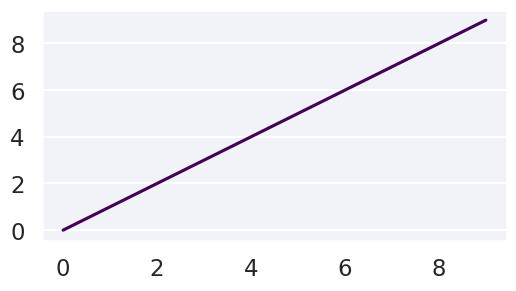

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('pandas1book') 
sns.set_context('talk')
plt.plot(range(10))

<Axes: xlabel='year'>

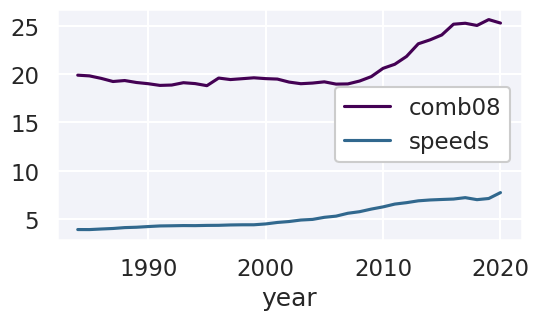

In [96]:
(autos2
   .groupby('year')
   [['comb08', 'speeds']]
   .mean()
   .plot()
)

<Axes: xlabel='year'>

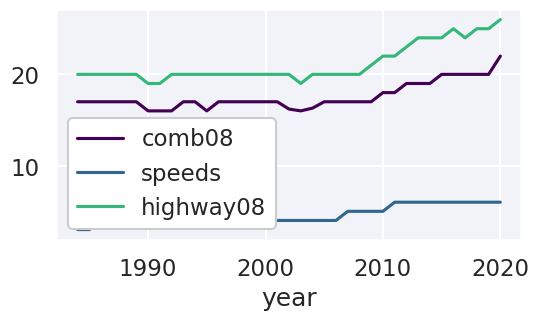

In [99]:
(autos2
   .groupby('year')
   [['comb08', 'speeds', 'highway08']]
   #.mean()
   #.median()
   .quantile(.3)
   #.std()
   #.var()
   .plot()
)

In [106]:
# add country
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['comb08', 'speeds']]
 .mean()
)

comb08    speeds
year country                     
1984 Other    21.417330  3.969054
     US       17.797119  3.872749
1985 Other    21.373068  3.958057
     US       18.025157  3.886792
1986 Other    21.213622  4.069659
     US       17.645390  3.886525
1987 Other    20.710414  4.142653
     US       17.326007  3.902930
1988 Other    20.814642  4.205607
     US       17.372951  4.028689
...                 ...       ...
2016 Other    24.439716  7.296859
     US       27.701818  6.301818
2017 Other    24.910521  7.474926
     US       26.496377  6.304348
2018 Other    24.779868  7.391345
     US       25.925267  5.601423
2019 Other    25.456922  7.545983
     US       26.250000  5.647887
2020 Other    25.174359  7.743590
     US       26.571429  7.785714

[74 rows x 2 columns]

In [107]:
# can go deeper and apply multiple aggregates
def second_to_last(ser):
    return ser.iloc[-2]

(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['comb08', 'speeds']]
 .agg(['min', 'mean', second_to_last])
)

comb08                           speeds                         
                min       mean second_to_last    min      mean second_to_last
year country                                                                 
1984 Other        8  21.417330             14      3  3.969054              5
     US           9  17.797119             17      3  3.872749              4
1985 Other        8  21.373068             20      3  3.958057              4
     US          10  18.025157             15      3  3.886792              4
1986 Other        7  21.213622             11      3  4.069659              4
     US          10  17.645390             17      3  3.886525              4
1987 Other        7  20.710414             12      3  4.142653              4
     US           9  17.326007             13      3  3.902930              4
1988 Other        7  20.814642             12      3  4.205607              4
     US           9  17.372951             14      3  4.028689              4
...             ...        ...            ...    ...       ...            ...
2016 Other       12  24.439716             30      1  7.296859              7
     US          12  27.701818             93      1  6.301818              1
2017 Other       11  24.910521             24      1  7.474926              7
     US          12  26.496377            126      0  6.304348              1
2018 Other       11  24.779868             12      0  7.391345              0
     US          14  25.925267            116      0  5.601423              1
2019 Other       11  25.456922             22      0  7.545983              8
     US          14  26.250000            104      0  5.647887              1
2020 Other       15  25.174359             20      0  7.743590              0
     US          22  26.571429             24      0  7.785714              0

[74 rows x 6 columns]

In [110]:
# back to simpler example, adding plots
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['comb08', 'speeds']]
 .mean()
 #.plot()
)

comb08    speeds
year country                     
1984 Other    21.417330  3.969054
     US       17.797119  3.872749
1985 Other    21.373068  3.958057
     US       18.025157  3.886792
1986 Other    21.213622  4.069659
     US       17.645390  3.886525
1987 Other    20.710414  4.142653
     US       17.326007  3.902930
1988 Other    20.814642  4.205607
     US       17.372951  4.028689
...                 ...       ...
2016 Other    24.439716  7.296859
     US       27.701818  6.301818
2017 Other    24.910521  7.474926
     US       26.496377  6.304348
2018 Other    24.779868  7.391345
     US       25.925267  5.601423
2019 Other    25.456922  7.545983
     US       26.250000  5.647887
2020 Other    25.174359  7.743590
     US       26.571429  7.785714

[74 rows x 2 columns]

In [112]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['comb08', 'speeds']]
 .mean()
 .unstack()
)

comb08               speeds          
country      Other      US        Other     US   
year                                             
1984     21.417330  17.797119  3.969054  3.872749
1985     21.373068  18.025157  3.958057  3.886792
1986     21.213622  17.645390  4.069659  3.886525
1987     20.710414  17.326007  4.142653  3.902930
1988     20.814642  17.372951  4.205607  4.028689
1989     20.662261  16.908898  4.264317  4.025424
1990     20.640747  16.577011  4.328149  4.105747
1991     20.174468  16.599532  4.341844  4.234192
1992     20.098731  16.735437  4.356841  4.252427
1993     20.309760  16.896373  4.371994  4.279793
1994     20.264423  16.829609  4.355769  4.293296
1995     20.091054  16.422287  4.380192  4.313783
1996     20.906615  16.961390  4.416342  4.262548
1997     20.509470  16.991453  4.452652  4.290598
1998     20.457295  17.408000  4.485765  4.272000
1999     20.386023  17.756972  4.507488  4.215139
2000     20.301370  17.757812  4.619863  4.253906
2001     20.289026  17.496212  4.761978  4.412879
2002     20.076923  16.979021  4.920174  4.367133
2003     19.953020  16.628763  5.154362  4.307692
2004     19.923833  16.805195  5.229730  4.308442
2005     19.892078  17.132203  5.362801  4.688136
2006     19.509025  17.285714  5.492178  4.776557
2007     19.452038  17.626712  5.864508  4.883562
2008     19.677985  17.937956  5.969332  5.120438
2009     20.186329  18.259928  6.189636  5.563177
2010     20.851598  19.600858  6.378995  5.866953
2011     21.635308  19.014870  6.714286  6.066914
2012     22.339751  20.111524  6.834655  6.286245
2013     23.471658  21.823293  7.033155  6.385542
2014     23.655870  23.012658  7.210526  6.046414
2015     23.935294  24.441065  7.211765  6.353612
2016     24.439716  27.701818  7.296859  6.301818
2017     24.910521  26.496377  7.474926  6.304348
2018     24.779868  25.925267  7.391345  5.601423
2019     25.456922  26.250000  7.545983  5.647887
2020     25.174359  26.571429  7.743590  7.785714

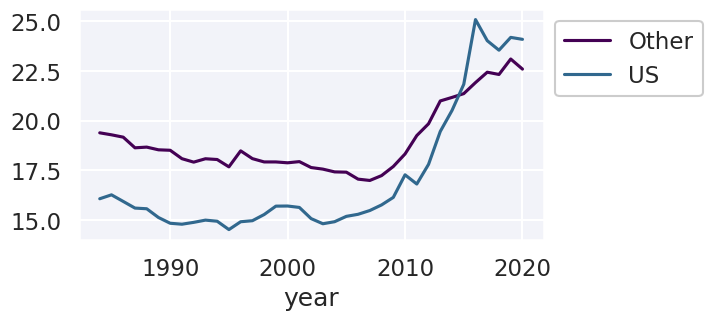

In [116]:
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['city08', 'speeds']]
 .mean()
 #.std()
 .unstack()
 .city08
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

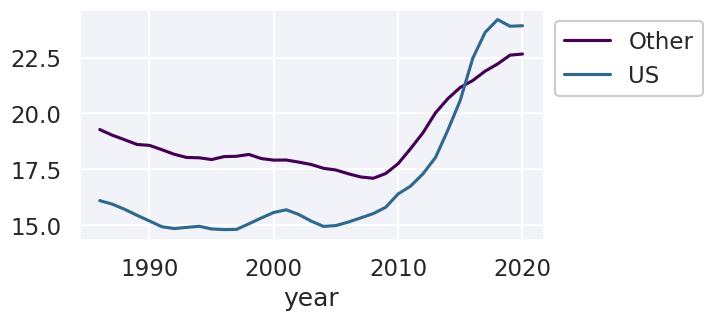

In [117]:
# smoothe it out a bit w/ rolling
(autos2
 .assign(country=autos2.make.apply(country))
 .groupby(['year', 'country'])
 [['city08', 'speeds']]
 .mean()
 .unstack()
 .city08
 .rolling(3)
 .mean()
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

<Axes: xlabel='year'>

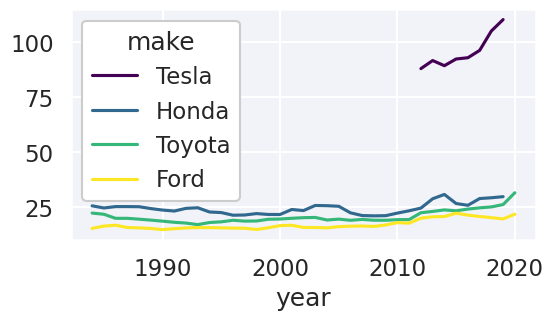

In [125]:
# One more example of cleaning up with Matplotlib
makes = ['Tesla', 'Honda', 'Toyota', 'Ford']
(autos
 .query('make.isin(@makes)')
 ##.loc[autos.make.isin(makes)]
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .loc[:, makes]
 .plot()
)

## Assign Exercise
* Find the median *city08* by *make*
* Plot the above
* Filter out "Toyota", "Honda", "Chevrolet", and "Porsche" and find the median *city08* by *make*
* Plot the above
* Find the max, mean, and min *city08* by decade

## Example of Fancy Plot

In [127]:
sns.reset_defaults()
makes = ['Tesla', 'Honda', 'Toyota', 'Ford']
colors = ['#e3120b', '#76725e', '#b3b09e', '#d2d0c4']
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax = (autos
 #.query('make.isin(@makes)')
 .loc[autos.make.isin(makes)]
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .loc[:, makes]
 .plot(color=colors, legend=False, linewidth=3, ax=ax)
)
plt.rcParams["font.family"] = "Roboto"
plt.grid(axis='y')
plt.suptitle('Annual City Mileage', ha='left', x=.12)
[ax.spines[side].set_visible(False) for side in ['top', 'left', 'right']]
ax.tick_params(left=False) # hide ticks
ax.set_xlabel('') # clear x label
ax.set_xticks(minor=True, ticks=range(1984,2020))
# set positions and labels for major ticks
ax.set_xticks(ticks=range(1985,2019,5))
ax.set_xticklabels(['1985', '90', '95', '2000', '05', '10', '2015'])
ax.set_yticks(ticks=range(0,121,20))
ax.set_yticklabels([]) # hide left hand side
for label in range(20,121,20): # my own vertically shifted y-labels
    ax.text(2022, label+3, f'{label}', color=colors[-3], ha='right')
for label, pos, color in zip(makes, [(2015, 110), # label makes
                              (2010, 33),
                              (1986, 20.5),
                              (1995, 10),
                             ], colors):
    ax.text(*pos, label, color=color, ha='left')
_ = ax.text(1982, -20, 'Source: fueleconomy.gov', ha='left')

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

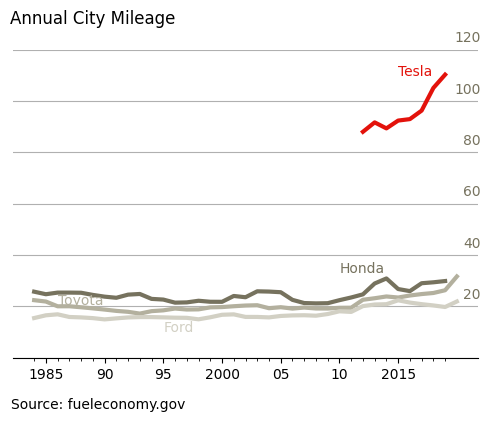

In [129]:
fig

In [76]:
# a glorious function
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']
    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8[pyarrow]'),
             displ=autos.displ.fillna(0).astype('float32[pyarrow]'),
             drive=autos.drive.replace('', 'Other').astype('category'),
             automatic=autos.trany.astype(str).str.contains('Auto'),
             speeds=autos.trany.astype(str).str.extract(r'(\d+)').fillna('20').astype('int8[pyarrow]'),
             createdOn=pd.to_datetime(autos
                .createdOn
                .replace({' EDT': ' -0400', ' EST': ' -0500'}, regex=True),
                          format='%a %b %d %H:%M:%S %z %Y', utc=True)
                .dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS')
            )
     .astype({'highway08': 'int8[pyarrow]', 'city08': 'int16[pyarrow]', 'comb08': 'int16[pyarrow]', 'fuelCost08': 'int16[pyarrow]',
              'range': 'int16[pyarrow]',  'year': 'int16[pyarrow]', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]
    )

tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.0,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.9,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.2,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.2,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,False
4,17,19,23,4,2.2,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
5,21,22,24,4,1.8,Front-Wheel Drive,1900,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,True,3,True
6,22,25,29,4,1.8,Front-Wheel Drive,1700,Subaru,Loyale,0,2013-01-01 00:00:00-05:00,1993,False,5,True
7,23,24,26,4,1.6,Front-Wheel Drive,1750,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,3,True
8,23,26,31,4,1.6,Front-Wheel Drive,1600,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,False,5,True
9,23,25,30,4,1.8,Front-Wheel Drive,1700,Toyota,Corolla,0,2013-01-01 00:00:00-05:00,1993,True,4,True


## Summary

* Correct types save space and enable convenient math, string, and date functionality
* Chaining operations will:
   * Make code readable
   * Remove bugs
   * Easier to debug
* Don't mutate (there's no point). Embrace chaining.
* ``.apply`` is slow for math
* Aggregations are powerful. Play with them until they make sense
* Upcoming courses
* https://store.metasnake.com

Follow me on Twitter ``@__mharrison__``

Book giveaway!


In [ ]:
import random
random.randrange(1,11)